# <p style="background-color:yellow;font-family:newtimeroman;font-size:75%;color:black;text-align:center;border-radius:20px 20px;"><b>Google Play Store App EDA & Data Visualization</b></p>

> <center><img src="https://media.tenor.com/8gXeiN5vTqEAAAAC/google-play-apps-google-play-services.gif"></center>

---

## <font color='yellow'><b>Steps Involved</b><font color='white'> 


<b>* <mark></mark> Defining the Problems</b><br>
<b>* <mark></mark> Checking versions of libraries</b><br>
<b>* <mark></mark>Importing dataset </b><br>
<b>* <mark></mark> Data understanding</b><br>
<b>* <mark></mark>Pre-Preocessing and cleaning of data</b><br>
<b>* <mark></mark> Summarizing the dataset to find actionables insights</b><br>
<b>* <mark></mark>Visualization of data</b><br>


# <p style="background-color:yellow;font-family:newtimeroman;font-size:75%;color:black;text-align:center;border-radius:20px;"><b>Features Descriptions ⇣ </b></p></div>

 <div style='text-align:left;center;color:white'> 
 
  **App** - Name of the Apps

 **Category** - Category of the app. Some examples are: ART_AND_DESIGN, FINANCE, COMICS, BEAUTY etc

 **rating** - The current average rating (out of 5) of the app on Google Play

 **reviews** - Number of user reviews given on the app

**Size** -  Size of the app in MB (megabytes)

 **Installs** - Number of times the app was downloaded from Google Play

**Types** - Whether the app is paid or free

 **Price** -  Price of the app in US$

**Last_Updated** -  Date on which the app was last updated on Google Play Store

<a id='color'></a>
# <p style="background-color:yellow;font-family:newtimeroman;font-size:75%;color:black;text-align:center;border-radius:20px;"><b>Importing Libraries ⇣ </b></p>

In [50]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.colors as colors
pio.templates.default = "plotly_white"
import os 
import warnings
warnings.filterwarnings('ignore')
from plotly.subplots import make_subplots

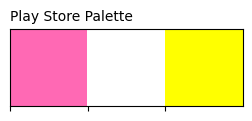

In [52]:
ax=sns.palplot(['hotpink', 'white','yellow'],)
plt.title("Play Store Palette ",loc='left',fontsize=10,y=1)
plt.show()

# <p style="background-color:yellow;font-family:newtimeroman;font-size:75%;color:black;text-align:center;border-radius:20px;"><b>Importing Data ⇣ </b></p>

In [5]:
data= pd.read_csv('googleplaystore.csv')

In [6]:
data[:4]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up


In [7]:
data.columns = data.columns.str.replace(" ","_")

<a id='color'></a>
# <p style="background-color:yellow;font-family:newtimeroman;font-size:75%;color:black;text-align:center;border-radius:20px;"><b>Handling Missing Data ⇣ </b></p>

In [8]:
data.isna().sum().to_frame()

,0
App,0
Category,0
Rating,1474
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content_Rating,1
Genres,0


In [9]:
rating_median = data["Rating"].median()
data["Rating"].fillna(rating_median, inplace=True)

In [10]:
data.dropna(inplace = True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  object 
 4   Size            10829 non-null  object 
 5   Installs        10829 non-null  object 
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  object 
 8   Content_Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last_Updated    10829 non-null  object 
 11  Current_Ver     10829 non-null  object 
 12  Android_Ver     10829 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


<a id='color'></a>
# <p style="background-color:yellow;font-family:newtimeroman;font-size:75%;color:black;text-align:center;border-radius:20px;"><b>Data Preprocessing  ⇣ </b></p>

In [12]:
data["Reviews"] = data["Reviews"].astype("int64")

In [13]:
data.Installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+'], dtype=object)

In [14]:
data.Installs = data.Installs.apply(lambda x:x.replace("+",""))
data.Installs = data.Installs.apply(lambda x:x.replace(",",""))
data.Installs = data.Installs.apply(lambda x:int(x))

same problem with Price Columns

In [15]:
data['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [16]:
data['Price'] = pd.to_numeric(data['Price'].str.replace('$',''))

In [17]:
data["Genres"] = data["Genres"].str.split(";").str[0]

In [18]:
data.Genres.unique()

array(['Art & Design', 'Auto & Vehicles', 'Beauty', 'Books & Reference',
       'Business', 'Comics', 'Communication', 'Dating', 'Education',
       'Entertainment', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Adventure', 'Arcade', 'Casual', 'Card', 'Action',
       'Strategy', 'Puzzle', 'Sports', 'Music', 'Word', 'Racing',
       'Simulation', 'Board', 'Trivia', 'Role Playing', 'Educational',
       'Music & Audio', 'Video Players & Editors', 'Medical', 'Social',
       'Shopping', 'Photography', 'Travel & Local', 'Tools',
       'Personalization', 'Productivity', 'Parenting', 'Weather',
       'News & Magazines', 'Maps & Navigation', 'Casino'], dtype=object)

In [19]:
data["Size"].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.7M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [20]:
data["Size"].replace("M","", regex=True, inplace = True)
data["Size"].replace("k","", regex=True, inplace = True)

In [21]:
size_median = data[data["Size"]!="Varies with device"]["Size"].astype(float).median()
data["Size"].replace("Varies with device", size_median, inplace=True)

In [22]:
data.Size = pd.to_numeric(data.Size)

In [23]:
data['Last_Updated']=pd.to_datetime(data['Last_Updated'])

In [24]:
data[:2]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design,2018-01-15,2.0.0,4.0.3 and up


<a id='color'></a>
# <p style="background-color:yellow;font-family:newtimeroman;font-size:75%;color:black;text-align:center;border-radius:20px;"><b>Data Visualization ⇣ </b></p>

In [25]:
fig = px.histogram(data, x='Type', color='Type',color_discrete_sequence= px.colors.qualitative.Alphabet_r
)

fig.update_layout(
    title='Free and Paid',
    xaxis=dict(title='Types'),
    yaxis=dict(title='No. of Data'),
    width=400,height=400,
    bargap=0.2
    
)

fig.show()

Free apps are more than Paid apps

### Same plot using pie plot

In [26]:
values = data.Type.value_counts().values
labels = data.Type.value_counts().index
fig = px.pie(data, 
             values=values, 
             names=labels,  
             title='Type',
             hole=0.5,
             color_discrete_sequence= px.colors.qualitative.Alphabet_r
)

fig.update_traces(textposition='auto', textinfo='percent+label')
fig.update_layout(title_text = 'App Distribution ',title_font= dict(size= 24),
                  width=700, height=400
)

fig.show()

In [27]:
fig = px.box(data, x='Type', y='Rating', color='Type', color_discrete_sequence=px.colors.qualitative.Alphabet_r
)
fig.update_layout(
    title='Comparison of Rating Free Vs Paid',
    xaxis=dict(title='Type'),
    yaxis=dict(title='Rating'),
    width=700,height=400
    
)
fig.show()

The average rating of Paid is higher than the Free..

In [28]:
fig = px.histogram(data, x='Content_Rating', color='Content_Rating',color_discrete_sequence= px.colors.qualitative.Alphabet_r
)

fig.update_layout(
    title='Content_Rating',
    xaxis=dict(title='Content_Rating'),
    yaxis=dict(title='No. of Ratings'),
    width=700,height=400,
    bargap=0.2
    
)

fig.show()

as you can see the most of the apps are in the Everyone Category , then followed by the teen and Everyone 10+ ..

In [29]:
fig = px.box(data, x='Content_Rating', y='Rating', color='Content_Rating', color_discrete_sequence=px.colors.qualitative.Alphabet_r
)
fig.update_layout(
    title='Comparison of Rating VS Content Rating',
    xaxis=dict(title='Content Rating'),
    yaxis=dict(title='Rating'),
    width=700,height=400
    
)
fig.show()

As you can see, the ratings are almost the same for Everyone, Teen, Everyone 10+. The Everyone has more outliers than other categories. Mature 17+ has the lowest average. The rating average of the 18+ category is higher than the others.

In [30]:
top_15_Category = data['Category'].value_counts().sort_values(ascending=False).head(15)

fig = px.bar(y=top_15_Category.index, x=top_15_Category.values, orientation='h', color_discrete_sequence=px.colors.qualitative.Alphabet_r
             )
fig.update_layout(
    title='Numbers of Category',
    xaxis=dict(title='Counts'),
    yaxis=dict(title='Category'),
    yaxis_categoryorder='total ascending',
    width = 700, height= 500
)
fig.show()

The most Applications are in the family Category , then followed by the Games and Tools..

In [31]:
fig = px.scatter(data, x='Category', y='Price', color='Category', color_discrete_sequence=px.colors.qualitative.Alphabet_r
)
fig.update_layout(
    title='Category & Price',
    width=700, height=500,
    xaxis=dict(title='Category', title_font=dict(color='white'), tickfont=dict(color='white')),
    yaxis=dict(title='Price', title_font=dict(color='white'), tickfont=dict(color='white')),
    plot_bgcolor='grey',
    paper_bgcolor='black',
    legend=dict(title='Category', font=dict(color='white')),
    title_font=dict(color='white')
)
fig.show()

Notice the highest Paid Applications are Finance , Lifestyle and Family

In [32]:
fig = px.histogram(data, x='Rating', nbins=20, marginal='rug', opacity=1, color_discrete_sequence=px.colors.qualitative.Alphabet_r)
fig.update_layout(
    title="Histogram with KDE for the Rating Column",
    xaxis_title="Ratings",
    yaxis_title="Counts",
    # paper_bgcolor='rgba(0,0,0,0)', 
    # plot_bgcolor='rgba(0,0,0,0)',  
    # font_color='white',
    width= 700 , height = 400           
)
fig.show()

As you can see, the most values are distributed around 4.3.

In [33]:
data[:1]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up


In [34]:
top_15_Category = data['Genres'].value_counts().sort_values(ascending=False).head(15)

fig = px.bar(y=top_15_Category.index, x=top_15_Category.values, orientation='h', color_discrete_sequence=px.colors.qualitative.Alphabet_r
             )
fig.update_layout(
    title='Numbers of Genres',
    xaxis=dict(title='Counts'),
    yaxis=dict(title='Genres'),
    yaxis_categoryorder='total ascending',
    width = 700, height= 500
)
fig.show()

Notice that the most gernes are from Tools , Entertainment , Education and followed by others .

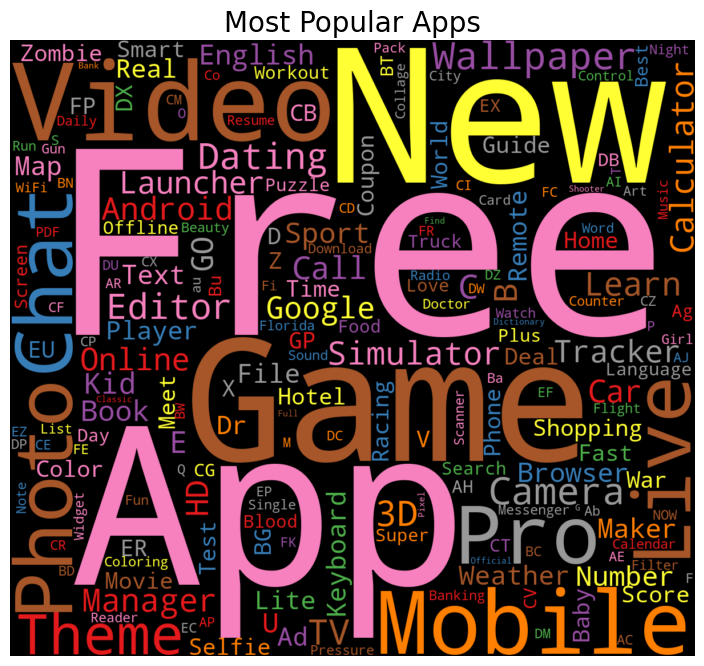

In [49]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text = " ".join(App for App in data.App)
word_cloud1 = WordCloud(collocations = False, background_color = 'black',
                        width = 1200, height = 1080,colormap='Set1').generate(text)
plt.figure(figsize=(18,8))
plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")
plt.title("Most Popular Apps", size=20)
plt.show()

# <p style="text-align:center;background-color:hotpink;font-family:newtimeroman;font-size:50%;color:black;text-align:center;border-radius:20px 20px;">🙇🏻‍♂️!<b></p>

# <p style="text-align:center;font-family:newtimeroman;font-size:90%;color:white;text-align:center">Prem Mandal....<b></p>

 <p style="text-align:center;font-family:newtimeroman;font-size:150%;color:yellow;text-align:center"> Let your happiness shine through! 😊 <b></p>